In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from yahoofinancials import YahooFinancials

In [38]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
yahoo_financials = YahooFinancials('^DJI')
data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2023-12-31', 
                                                  time_interval='daily')
df = pd.DataFrame(data['^DJI']['prices'])
df = df.drop('date', axis=1).set_index('formatted_date')
df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2000-01-03,11522.009766,11305.690430,11501.849609,11357.509766,169750000,11357.509766
2000-01-04,11350.059570,10986.450195,11349.750000,10997.929688,178420000,10997.929688
2000-01-05,11215.099609,10938.669922,10989.370117,11122.650391,203190000,11122.650391
2000-01-06,11313.450195,11098.450195,11113.370117,11253.259766,176550000,11253.259766
2000-01-07,11528.139648,11239.919922,11247.059570,11522.559570,184900000,11522.559570


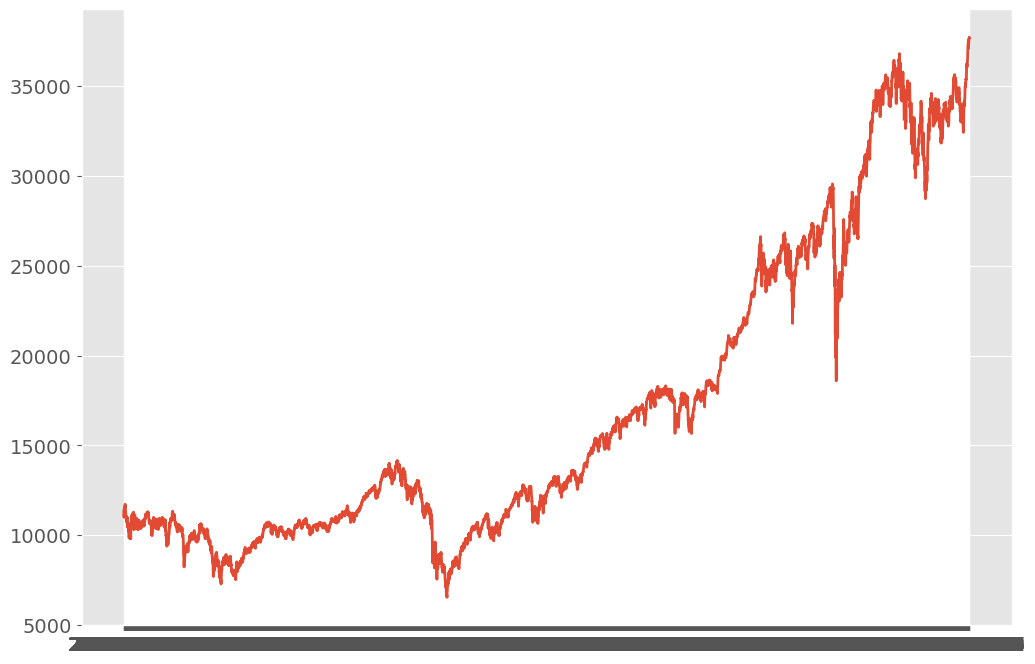

In [49]:
plt.plot(df.index, df['adjclose'])

In [54]:
df['Return'] = df['adjclose'].pct_change().fillna(0)

In [55]:
# Calculate mean and sigma
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])

mu, sigma

(0.00026804644735752345, 0.011765959572539642)

In [56]:
def zscore(returns):
    zs = (returns - np.mean(returns))/np.std(returns)
    return zs

In [57]:
df['Scaled_Return'] = df['Return'].apply(lambda x: (x-mu)/sigma)

In [58]:
# Calculate minimum and maximum bin range
sr_min = np.min(df['Scaled_Return'])
sr_max = np.max(df['Scaled_Return'])

sr_min, sr_max

(-11.009174451289775, 9.63647417346043)

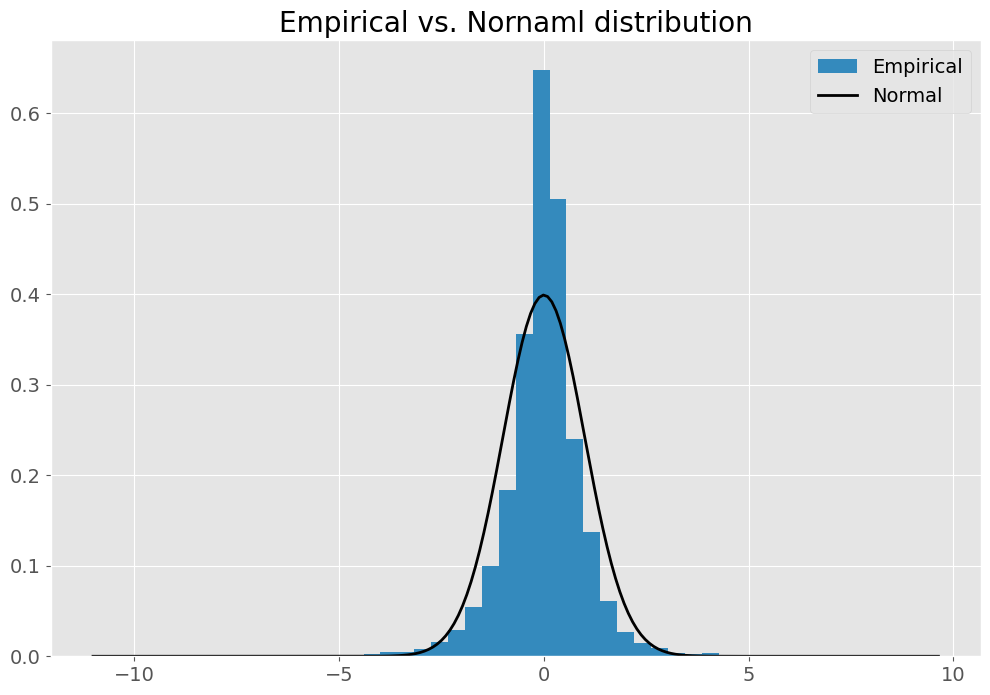

In [59]:
x = np.linspace(sr_min, sr_max, 200)

# Calculate Normal probability density function 
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))

plt.hist(df['Scaled_Return'], bins=50, density=True, label='Empirical',  color='C1', alpha=1)
plt.plot(x, y, color='black', label='Normal', alpha=1)
plt.title('Empirical vs. Nornaml distribution')
plt.legend()
plt.show()